In [1]:
import numpy as np 
import scipy.special
import os

In [2]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 12}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

## Hermite basis functions
We employ the symmetrically-weighted (SW) and asymmetrically-weighted (AW) Hermite basis functions for discretization in velocity $v$, where
\begin{align*}
\begin{split}
\psi_{n}^{sw}(\xi^{s}) &= (\sqrt{\pi} 2^n n!)^{-\frac{1}{2}} H_{n}(\xi^{s}) \exp{\left[\frac{(\xi^{s})^2}{2}\right]},\\
\psi^{n}_{sw}(\xi^{s}) &= \psi_{n}^{sw}(\xi^{s}),\\
\psi_{n}^{aw}(\xi^{s}) &= (\pi 2^n n!)^{-\frac{1}{2}} H_{n}(\xi^{s}) \exp{\left[(\xi^{s})^2\right]},\\
\psi^{n}_{aw}(\xi^{s}) &= (2^n n!)^{-\frac{1}{2}} H_{n}(\xi^{s}),\\
H_{n}(\xi^{s}) &= (-1)^n \exp{[(\xi^{s})^2]} \frac{\mathrm{d}}{\mathrm{d}(\xi^{s})^n} \exp{[-(\xi^{s})^2]},  \\
\xi_{s} &= \frac{v-u^{s}}{\alpha^{s}}, 
\end{split}
\end{align*}
and $u^{s}, \alpha^{s} \in \mathbb{R}$ are constants. The orthonormal property of the Hermite basis function is given by
\begin{align*}
    \int_{\Omega_{v}} \psi_{n}(\xi^{s}) \psi^{m}(\xi^{s})\mathrm{d}\xi^{s} = \delta_{nm},
\end{align*}
where $\delta_{nm}$ is the Dirac delta function. 

In [3]:
# define the xi-domain
xi = np.linspace(-5, 5, int(1e2))

In [4]:
# define the Hermite basis functions
def psi_ln_sw(xi, deg=0):
    hermite = scipy.special.hermite(n=deg)
    return (np.sqrt(np.pi) * (2**deg) * scipy.special.factorial(deg))**(-1/2) * hermite(xi) * np.exp(-(xi**2)/2)

def psi_ln_aw(xi, deg=0):
    hermite = scipy.special.hermite(n=deg)
    return (np.pi * (2**deg) * scipy.special.factorial(deg))**(-1/2) * hermite(xi) * np.exp(-xi**2)

def psi_un_aw(xi, deg=0):
    hermite = scipy.special.hermite(n=deg)
    return ((2**deg) * scipy.special.factorial(deg))**(-1/2) * hermite(xi)

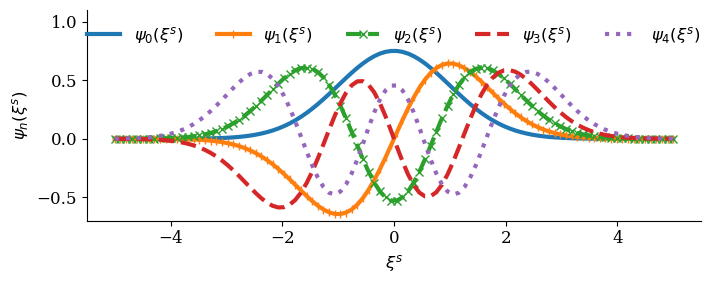

In [5]:
fig, ax = plt.subplots(figsize=(7.5, 3))

ax.plot(xi, psi_ln_sw(xi, deg=0), "-", linewidth=3, label=r"$\psi_{0}(\xi^{s})$")
ax.plot(xi, psi_ln_sw(xi, deg=1), "-|", linewidth=3, label=r"$\psi_{1}(\xi^{s})$")
ax.plot(xi, psi_ln_sw(xi, deg=2), "--x", linewidth=3, label=r"$\psi_{2}(\xi^{s})$")
ax.plot(xi, psi_ln_sw(xi, deg=3), "--", linewidth=3, label=r"$\psi_{3}(\xi^{s})$")
ax.plot(xi, psi_ln_sw(xi, deg=4), ":", linewidth=3, label=r"$\psi_{4}(\xi^{s})$")

legend = ax.legend(ncols=5, fancybox=False, shadow=False, fontsize=12, loc='upper center')
legend.get_frame().set_alpha(0)
ax.set_xlabel(r"$\xi^{s}$")
ax.set_ylim(-0.7, 1.1)
ax.set_ylabel(r"$\psi_{n}(\xi^{s})$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("../figs/polynomials/sw_hermite_polynomials_ln.png", dpi=600)

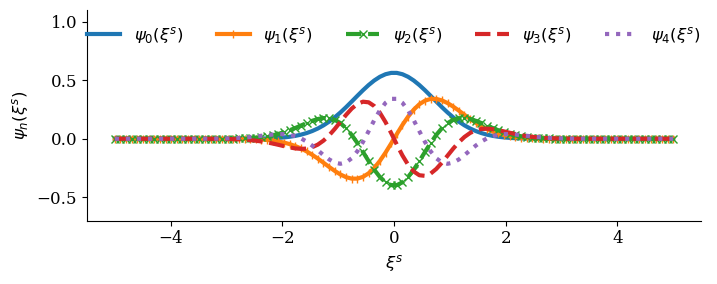

In [6]:
fig, ax = plt.subplots(figsize=(7.5, 3))

ax.plot(xi, psi_ln_aw(xi, deg=0), "-", linewidth=3, label=r"$\psi_{0}(\xi^{s})$")
ax.plot(xi, psi_ln_aw(xi, deg=1), "-|", linewidth=3, label=r"$\psi_{1}(\xi^{s})$")
ax.plot(xi, psi_ln_aw(xi, deg=2), "--x", linewidth=3, label=r"$\psi_{2}(\xi^{s})$")
ax.plot(xi, psi_ln_aw(xi, deg=3), "--", linewidth=3, label=r"$\psi_{3}(\xi^{s})$")
ax.plot(xi, psi_ln_aw(xi, deg=4), ":", linewidth=3, label=r"$\psi_{4}(\xi^{s})$")

legend = ax.legend(ncols=5, fancybox=False, shadow=False, fontsize=12, loc='upper center')
legend.get_frame().set_alpha(0)
ax.set_xlabel(r"$\xi^{s}$")
ax.set_ylim(-0.7, 1.1)
ax.set_ylabel(r"$\psi_{n}(\xi^{s})$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("../figs/polynomials/aw_hermite_polynomials_ln.png", dpi=600)

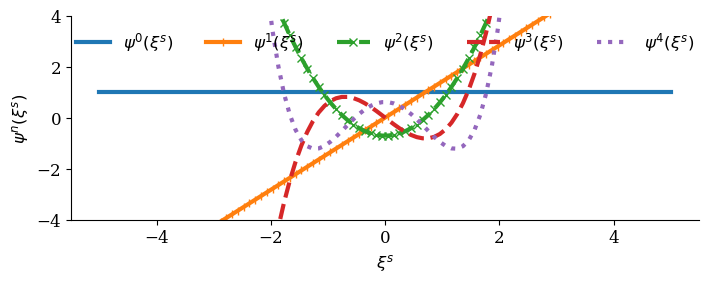

In [7]:
fig, ax = plt.subplots(figsize=(7.5, 3))

ax.plot(xi, psi_un_aw(xi, deg=0), "-", linewidth=3, label=r"$\psi^{0}(\xi^{s})$")
ax.plot(xi, psi_un_aw(xi, deg=1), "-|", linewidth=3, label=r"$\psi^{1}(\xi^{s})$")
ax.plot(xi, psi_un_aw(xi, deg=2), "--x", linewidth=3, label=r"$\psi^{2}(\xi^{s})$")
ax.plot(xi, psi_un_aw(xi, deg=3), "--", linewidth=3, label=r"$\psi^{3}(\xi^{s})$")
ax.plot(xi, psi_un_aw(xi, deg=4), ":", linewidth=3, label=r"$\psi^{4}(\xi^{s})$")

legend = ax.legend(ncols=5, fancybox=False, shadow=False, fontsize=12, loc='upper center')
legend.get_frame().set_alpha(0)
ax.set_xlabel(r"$\xi^{s}$")
ax.set_ylim(-4, 4)
ax.set_ylabel(r"$\psi^{n}(\xi^{s})$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("../figs/polynomials/aw_hermite_polynomials_un.png", dpi=600)

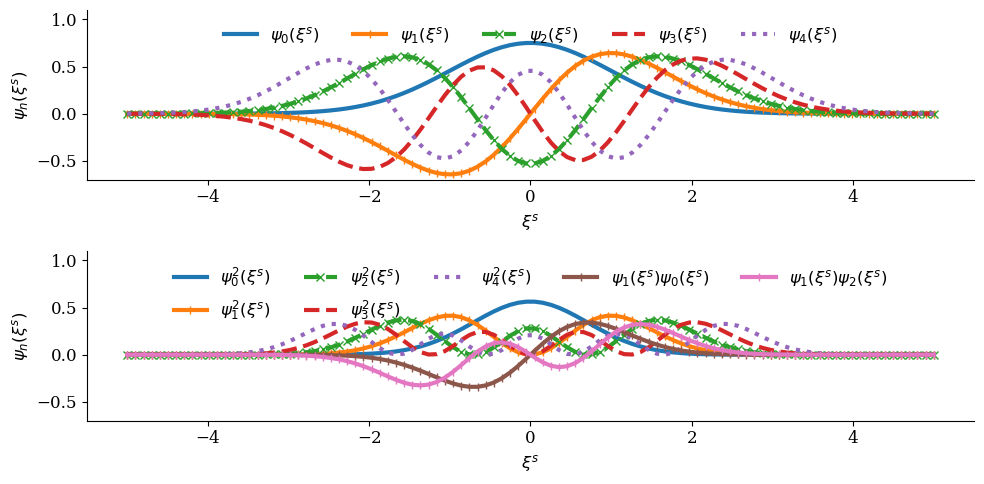

In [19]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 5))

ax[0].plot(xi, psi_ln_sw(xi, deg=0), "-", linewidth=3, label=r"$\psi_{0}(\xi^{s})$")
ax[0].plot(xi, psi_ln_sw(xi, deg=1), "-|", linewidth=3, label=r"$\psi_{1}(\xi^{s})$")
ax[0].plot(xi, psi_ln_sw(xi, deg=2), "--x", linewidth=3, label=r"$\psi_{2}(\xi^{s})$")
ax[0].plot(xi, psi_ln_sw(xi, deg=3), "--", linewidth=3, label=r"$\psi_{3}(\xi^{s})$")
ax[0].plot(xi, psi_ln_sw(xi, deg=4), ":", linewidth=3, label=r"$\psi_{4}(\xi^{s})$")

ax[1].plot(xi, psi_ln_sw(xi, deg=0)**2, "-", linewidth=3, label=r"$\psi^{2}_{0}(\xi^{s})$")
ax[1].plot(xi, psi_ln_sw(xi, deg=1)**2, "-|", linewidth=3, label=r"$\psi^{2}_{1}(\xi^{s})$")
ax[1].plot(xi, psi_ln_sw(xi, deg=2)**2, "--x", linewidth=3, label=r"$\psi^{2}_{2}(\xi^{s})$")
ax[1].plot(xi, psi_ln_sw(xi, deg=3)**2, "--", linewidth=3, label=r"$\psi^{2}_{3}(\xi^{s})$")
ax[1].plot(xi, psi_ln_sw(xi, deg=4)**2, ":", linewidth=3, label=r"$\psi^{2}_{4}(\xi^{s})$")
ax[1].plot(xi, psi_ln_sw(xi, deg=1)*psi_ln_sw(xi, deg=0), "-|", linewidth=3, label=r"$\psi_{1}(\xi^{s}) \psi_{0}(\xi^{s})$")
ax[1].plot(xi, psi_ln_sw(xi, deg=1)*psi_ln_sw(xi, deg=2), "-|", linewidth=3, label=r"$\psi_{1}(\xi^{s}) \psi_{2}(\xi^{s})$")


legend = ax[0].legend(ncols=5, fancybox=False, shadow=False, fontsize=12, loc='upper center')
legend.get_frame().set_alpha(0)
ax[0].set_xlabel(r"$\xi^{s}$")
ax[0].set_ylim(-0.7, 1.1)
ax[0].set_ylabel(r"$\psi_{n}(\xi^{s})$")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

legend = ax[1].legend(ncols=5, fancybox=False, shadow=False, fontsize=12, loc='upper center')
legend.get_frame().set_alpha(0)
ax[1].set_xlabel(r"$\xi^{s}$")
ax[1].set_ylim(-0.7, 1.1)
ax[1].set_ylabel(r"$\psi_{n}(\xi^{s})$")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig("../figs/polynomials/aw_hermite_polynomials_ln.png", dpi=600)